In [ ]:
from glob import glob
import pandas as pd
import os

**Checking if all images has a corresponding label**

In [ ]:
print("Train Data")
print("Glioma")
print(len(glob("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Train/Glioma/images/*.jpg")))
print(len(glob("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Train/Glioma/labels/*.txt")))
print("Meningioma")
print(len(glob("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Train/Meningioma/images/*.jpg")))
print(len(glob("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Train/Meningioma/labels/*.txt")))
print("No Tumor")
print(len(glob("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/*.jpg")))
print(len(glob("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/labels/*.txt")))
print("Pituitary")
print(len(glob("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Train/Pituitary/images/*.jpg")))
print(len(glob("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Train/Pituitary/labels/*.txt")))

Train Data
Glioma
1153
1153
Meningioma
1449
1449
No Tumor
711
711
Pituitary
1424
1424


In [ ]:
print("Val Data")
print("Glioma")
print(len(glob("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Val/Glioma/images/*.jpg")))
print(len(glob("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Val/Glioma/labels/*.txt")))
print("Meningioma")
print(len(glob("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Val/Meningioma/images/*.jpg")))
print(len(glob("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Val/Meningioma/labels/*.txt")))
print("No Tumor")
print(len(glob("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Val/No Tumor/images/*.jpg")))
print(len(glob("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Val/No Tumor/labels/*.txt")))
print("Pituitary")
print(len(glob("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Val/Pituitary/images/*.jpg")))
print(len(glob("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Val/Pituitary/labels/*.txt")))

Val Data
Glioma
136
136
Meningioma
140
140
No Tumor
100
100
Pituitary
136
136


**There is an unblance in the data so we need to use Augmentors**<br>
**Unfortunately we can't use augmentors because we can't make new lables for the output image so this data might get a low accuracy**

In [ ]:
yaml_content = """train: /kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Train
val: /kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Val
nc: 4
names: ["Glioma", "Meningioma", "No Tumor", "Pituitary"]
"""

# Save the data.yaml file
with open("/kaggle/working/data.yaml", "w") as f:
    f.write(yaml_content)

print("data.yaml created successfully!")

data.yaml created successfully!


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
results = model.train(data="/kaggle/working/data.yaml", epochs=50, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 379MB/s]


Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

100%|██████████| 755k/755k [00:00<00:00, 107MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 306MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.8±1.9 ms, read: 5.6±2.7 MB/s, size: 37.3 KB)


train: Scanning /kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Train/Glioma/labels... 4737 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4737/4737 [00:55<00:00, 85.62it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Train/Glioma is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 5.2±2.3 MB/s, size: 26.3 KB)


val: Scanning /kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Val/Glioma/labels... 510 images, 3 backgrounds, 0 corrupt: 100%|██████████| 512/512 [00:05<00:00, 91.60it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Val/Glioma is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.12G      1.028      2.372      1.218          3        640: 100%|██████████| 297/297 [01:28<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.95it/s]

                   all        512        554      0.827      0.739      0.824      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.61G      1.033      1.369      1.206          1        640: 100%|██████████| 297/297 [01:24<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]

                   all        512        554      0.874      0.748      0.858      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.61G       1.04      1.128      1.211          2        640: 100%|██████████| 297/297 [01:24<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.72it/s]

                   all        512        554      0.808      0.747      0.823       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.64G      1.022     0.9918        1.2          2        640: 100%|██████████| 297/297 [01:28<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]

                   all        512        554      0.887       0.82      0.896      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.66G     0.9899     0.8962      1.184          4        640: 100%|██████████| 297/297 [01:24<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.65it/s]

                   all        512        554      0.845      0.859      0.909      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.67G      0.973     0.8555      1.173          1        640: 100%|██████████| 297/297 [01:23<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.61it/s]

                   all        512        554       0.79      0.769      0.852       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.68G     0.9551     0.8195      1.158          2        640: 100%|██████████| 297/297 [01:24<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.62it/s]

                   all        512        554      0.851        0.8       0.89      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.71G     0.9562     0.7869      1.159          1        640: 100%|██████████| 297/297 [01:22<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.22it/s]

                   all        512        554      0.919      0.842      0.918      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.72G     0.9286     0.7475      1.151          1        640: 100%|██████████| 297/297 [01:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.99it/s]

                   all        512        554      0.905      0.854      0.924       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.74G     0.9212     0.7276      1.141          4        640: 100%|██████████| 297/297 [01:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.04it/s]

                   all        512        554      0.847      0.844       0.91      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.75G     0.8995     0.7084      1.129          2        640: 100%|██████████| 297/297 [01:23<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]

                   all        512        554      0.892      0.899      0.933       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.78G     0.8921     0.6901      1.122          1        640: 100%|██████████| 297/297 [01:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.58it/s]

                   all        512        554      0.937      0.862      0.938      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.79G     0.8746     0.6625      1.113          2        640: 100%|██████████| 297/297 [01:23<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.59it/s]

                   all        512        554      0.881      0.902      0.934      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.81G     0.8788     0.6596      1.116          2        640: 100%|██████████| 297/297 [01:24<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.67it/s]

                   all        512        554      0.915      0.901      0.949      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.82G     0.8682     0.6358      1.112          1        640: 100%|██████████| 297/297 [01:23<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.82it/s]

                   all        512        554      0.933      0.898      0.947      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.84G      0.869     0.6386      1.105          1        640: 100%|██████████| 297/297 [01:23<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]

                   all        512        554      0.921      0.908       0.94      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.86G     0.8482      0.619      1.107          2        640: 100%|██████████| 297/297 [01:23<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.02it/s]

                   all        512        554      0.925      0.921      0.956      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.88G     0.8553     0.6071      1.107          3        640: 100%|██████████| 297/297 [01:23<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]

                   all        512        554      0.943      0.913      0.955      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.88G     0.8432     0.5981      1.099          2        640: 100%|██████████| 297/297 [01:24<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.59it/s]

                   all        512        554      0.917      0.894      0.943      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.91G     0.8351     0.5852      1.094          2        640: 100%|██████████| 297/297 [01:23<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.63it/s]

                   all        512        554      0.944      0.913      0.954      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.93G     0.8302     0.5745      1.087          2        640: 100%|██████████| 297/297 [01:24<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.59it/s]

                   all        512        554      0.948       0.91      0.958      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.95G     0.8082     0.5686      1.073          0        640: 100%|██████████| 297/297 [01:22<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.94it/s]

                   all        512        554      0.922      0.915      0.954       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.95G      0.821     0.5713      1.083          2        640: 100%|██████████| 297/297 [01:23<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.89it/s]

                   all        512        554       0.94      0.914      0.952      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.98G     0.8143     0.5554      1.083          3        640: 100%|██████████| 297/297 [01:23<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.28it/s]

                   all        512        554      0.941      0.909      0.956      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         3G     0.8056      0.549      1.075          2        640: 100%|██████████| 297/297 [01:23<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.68it/s]

                   all        512        554      0.933      0.933      0.956       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.01G     0.8008     0.5345      1.076          5        640: 100%|██████████| 297/297 [01:23<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]

                   all        512        554      0.932      0.929       0.96      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.02G     0.8144      0.533      1.086          1        640: 100%|██████████| 297/297 [01:24<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.72it/s]

                   all        512        554      0.948      0.934      0.959      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.05G     0.7907     0.5283      1.069          1        640: 100%|██████████| 297/297 [01:22<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.89it/s]

                   all        512        554      0.946      0.923      0.959      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.06G     0.7872     0.5096      1.066          0        640: 100%|██████████| 297/297 [01:22<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.96it/s]

                   all        512        554      0.932      0.938      0.959      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.08G     0.7725      0.509      1.059          1        640: 100%|██████████| 297/297 [01:23<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.68it/s]

                   all        512        554      0.949       0.93      0.963      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.09G     0.7627     0.4895      1.055          1        640: 100%|██████████| 297/297 [01:23<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.65it/s]

                   all        512        554      0.948      0.931      0.959      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.12G     0.7858     0.5016      1.064          5        640: 100%|██████████| 297/297 [01:24<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.67it/s]

                   all        512        554      0.939      0.946      0.956      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.13G     0.7623     0.4922      1.059          3        640: 100%|██████████| 297/297 [01:23<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.21it/s]

                   all        512        554      0.942      0.947       0.96      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.15G     0.7645     0.4798      1.053          1        640: 100%|██████████| 297/297 [01:23<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.90it/s]

                   all        512        554      0.958       0.94      0.963      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.16G     0.7644     0.4789      1.052          1        640: 100%|██████████| 297/297 [01:23<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.95it/s]

                   all        512        554      0.953      0.918      0.958      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.18G     0.7544     0.4868      1.049          1        640: 100%|██████████| 297/297 [01:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]

                   all        512        554      0.949      0.938      0.959      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       3.2G     0.7529     0.4656      1.044          1        640: 100%|██████████| 297/297 [01:23<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.72it/s]

                   all        512        554      0.944      0.934      0.959      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.22G      0.728     0.4476      1.035          1        640: 100%|██████████| 297/297 [01:24<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.69it/s]

                   all        512        554      0.947      0.942      0.965      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.22G     0.7406     0.4529      1.038          1        640: 100%|██████████| 297/297 [01:22<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.24it/s]

                   all        512        554      0.952       0.93      0.963      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.25G     0.7422     0.4508      1.044          4        640: 100%|██████████| 297/297 [01:21<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.96it/s]

                   all        512        554      0.946      0.944      0.964      0.785


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.27G     0.6884     0.3886       1.01          1        640: 100%|██████████| 297/297 [01:20<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.71it/s]

                   all        512        554      0.953       0.94      0.963      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.29G      0.675     0.3721      1.002          1        640: 100%|██████████| 297/297 [01:19<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.94it/s]

                   all        512        554       0.96      0.927      0.962       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.29G     0.6704     0.3643     0.9949          2        640: 100%|██████████| 297/297 [01:18<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.73it/s]

                   all        512        554      0.949       0.95      0.967      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.32G     0.6632     0.3702     0.9943          1        640: 100%|██████████| 297/297 [01:19<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.05it/s]

                   all        512        554      0.946      0.947      0.964      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.34G     0.6571     0.3506     0.9927          1        640: 100%|██████████| 297/297 [01:19<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.61it/s]

                   all        512        554      0.958      0.941      0.968      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.36G     0.6476     0.3429     0.9857          1        640: 100%|██████████| 297/297 [01:20<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]

                   all        512        554      0.955      0.941      0.965      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.36G     0.6458     0.3465     0.9807          1        640: 100%|██████████| 297/297 [01:18<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.64it/s]

                   all        512        554      0.954      0.941      0.966      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.39G     0.6371     0.3335     0.9786          1        640: 100%|██████████| 297/297 [01:18<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.07it/s]

                   all        512        554      0.939      0.953      0.963      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.41G     0.6368     0.3442     0.9785          1        640: 100%|██████████| 297/297 [01:18<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.75it/s]

                   all        512        554      0.949      0.941      0.966        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.42G      0.627     0.3258     0.9703          2        640: 100%|██████████| 297/297 [01:20<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]

                   all        512        554      0.951      0.942      0.967      0.803



50 epochs completed in 1.222 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.58it/s]


                   all        512        554      0.951      0.943      0.967      0.803
                Glioma        135        153      0.916      0.889      0.934      0.761
            Meningioma        140        142      0.993      0.998      0.994      0.846
              No Tumor         98         98      0.977       0.98      0.989      0.847
             Pituitary        154        161      0.918      0.907      0.952      0.757
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train


In [ ]:
from PIL import Image


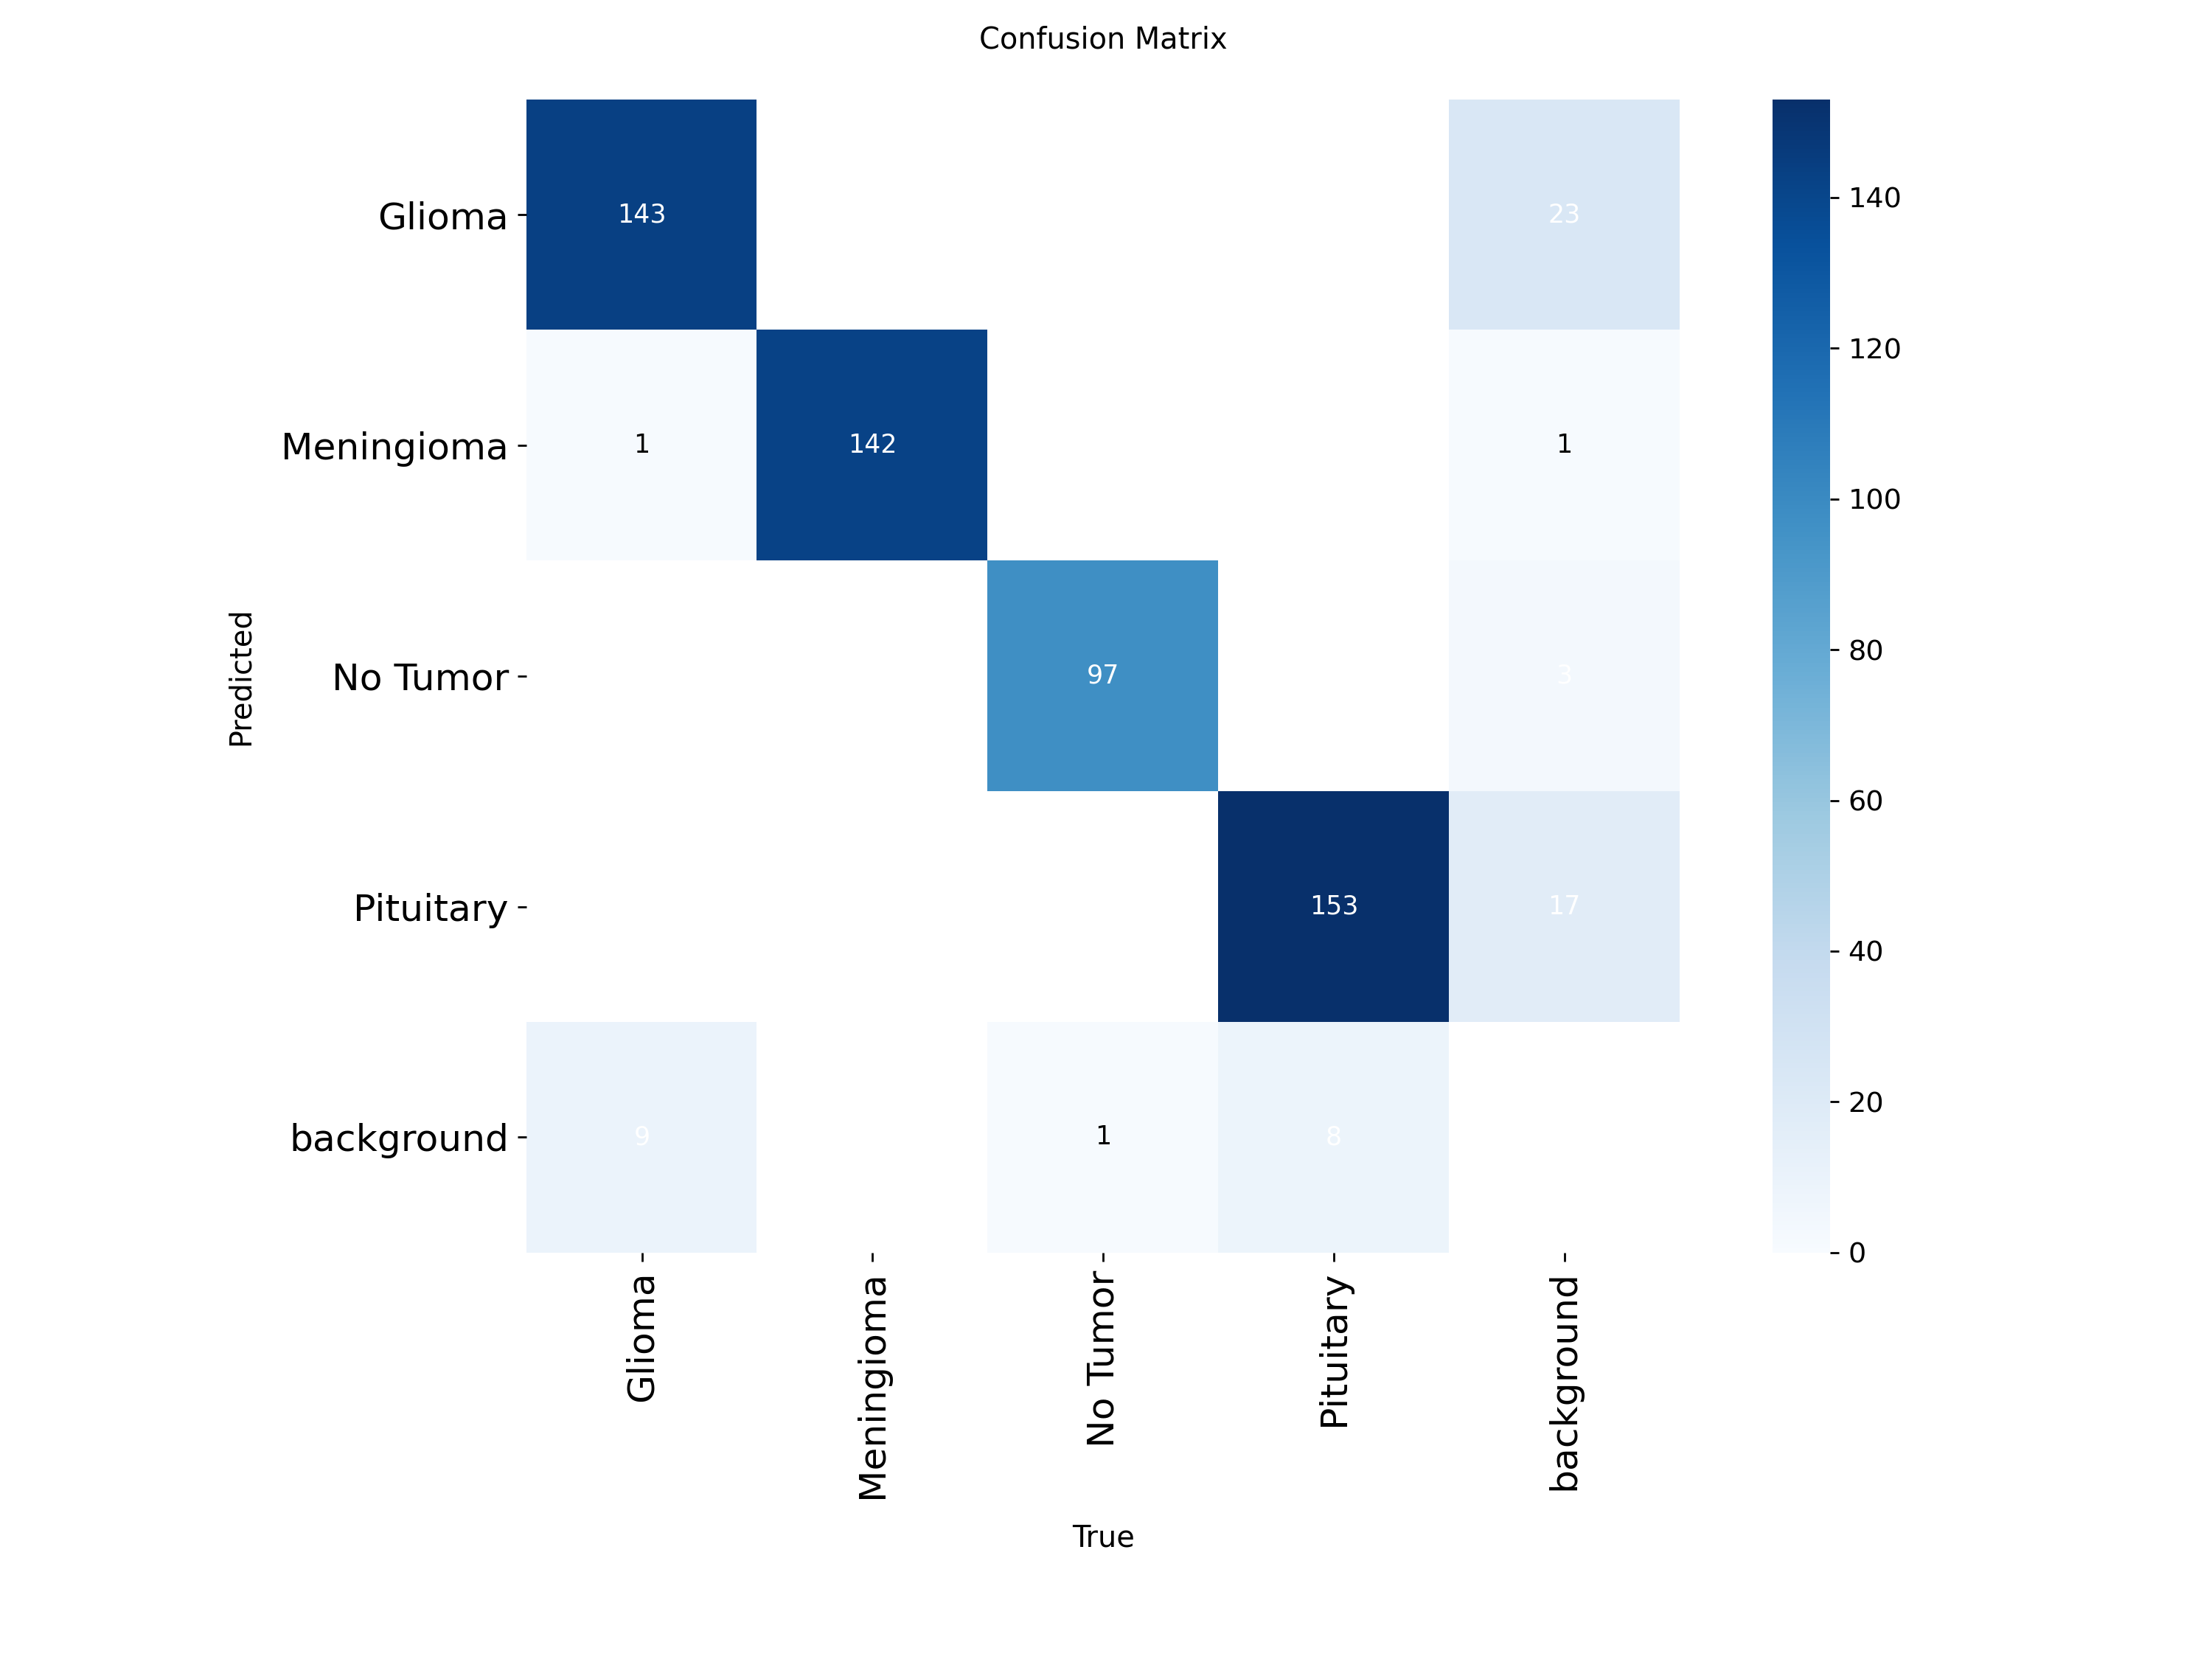

In [ ]:
Image.open("runs/detect/train/confusion_matrix.png")

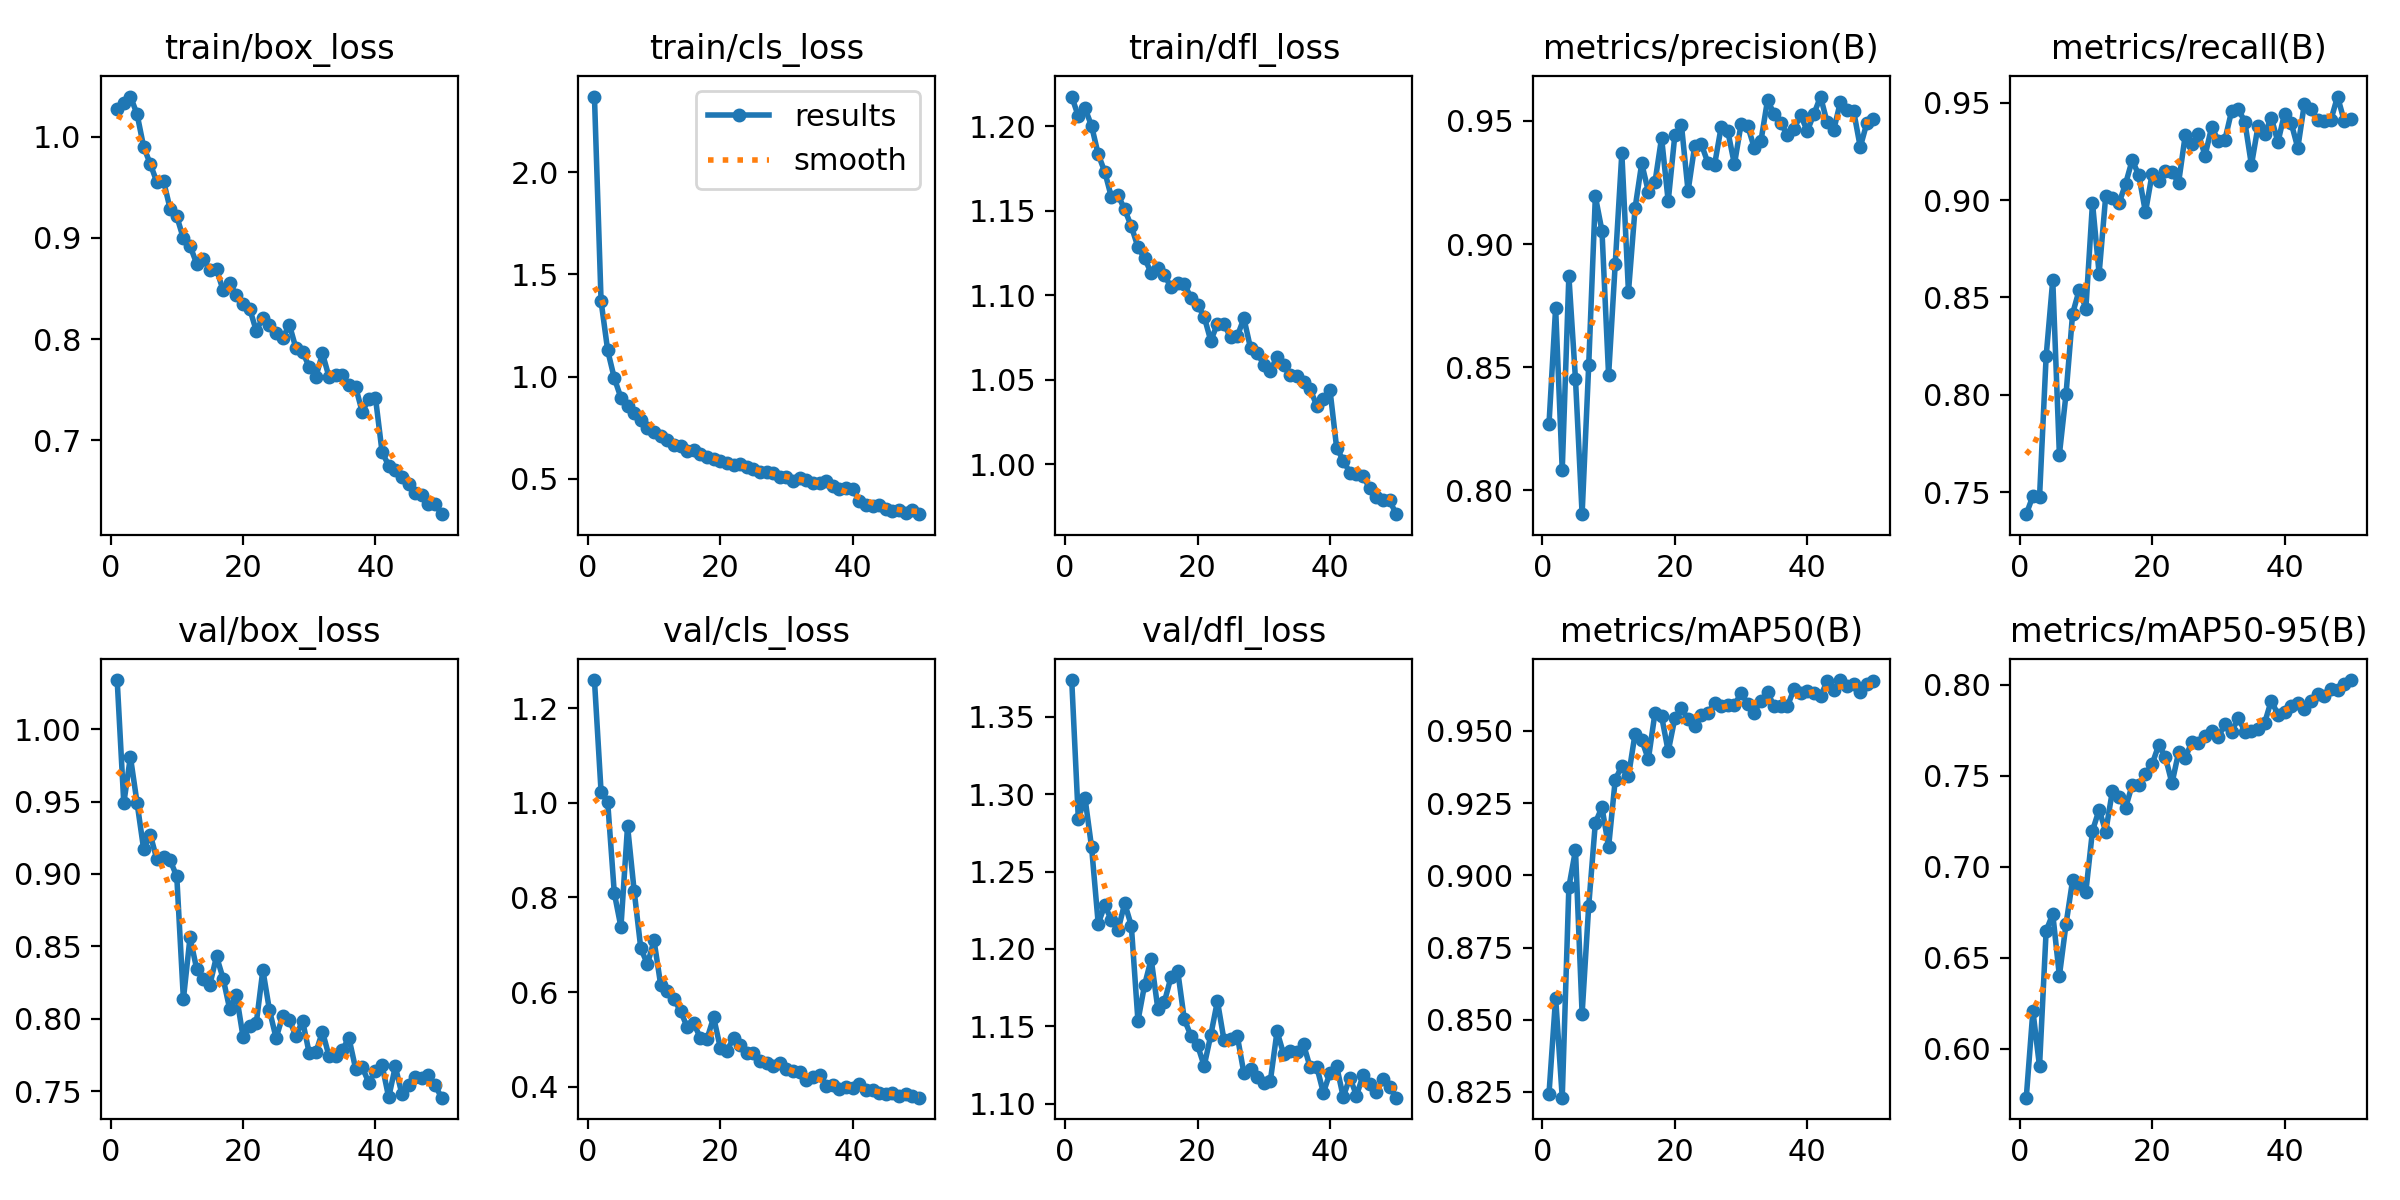

In [ ]:
Image.open("runs/detect/train/results.png")

In [ ]:
import pandas as pd
res = pd.read_csv("runs/detect/train/results.csv")
res.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,4063.96,0.64758,0.34291,0.98573,0.95457,0.94058,0.96539,0.79365,0.75975,0.38645,1.11292,0.000136,0.000136,0.000136
46,47,4147.27,0.64577,0.34652,0.98067,0.95404,0.94112,0.96618,0.79777,0.75885,0.37990,1.10750,0.000111,0.000111,0.000111
47,48,4231.19,0.63707,0.33347,0.97858,0.93942,0.95314,0.96334,0.79688,0.76083,0.38384,1.11593,0.000087,0.000087,0.000087
48,49,4314.75,0.63677,0.34415,0.97846,0.94917,0.94072,0.96634,0.80026,0.75392,0.38028,1.11104,0.000062,0.000062,0.000062
49,50,4400.01,0.62698,0.32584,0.97033,0.95074,0.94166,0.96720,0.80262,0.74545,0.37670,1.10399,0.000037,0.000037,0.000037


In [ ]:
pred_model = YOLO("runs/detect/train/weights/best.pt")

In [ ]:
import shutil

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define source and destination paths
source_path = "runs/detect/train/weights/best.pt"
destination_path = "/content/drive/MyDrive/Brain_tumour_models1.pt"  # Change the path if you want a different folder

# Step 3: Copy the file to Google Drive
shutil.copy(source_path, destination_path)

print("Model file copied to Google Drive successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model file copied to Google Drive successfully!


In [ ]:


# Step 2: Zip the 'runs' folder
shutil.make_archive("runs_backup", 'zip', "runs")

# Step 3: Move the zipped file to Google Drive
shutil.move("runs_backup.zip", "/content/drive/MyDrive/runs_backup.zip")

print("Zipped 'runs' folder and moved to Google Drive successfully!")


Zipped 'runs' folder and moved to Google Drive successfully!


In [ ]:
res_img = pred_model.predict("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Val/Glioma/images/Tr-gl_0202.jpg", conf=.50)


image 1/1 /kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Val/Glioma/images/Tr-gl_0202.jpg: 640x640 (no detections), 8.7ms
Speed: 5.3ms preprocess, 8.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
res_img

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Glioma', 1: 'Meningioma', 2: 'No Tumor', 3: 'Pituitary'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         

In [ ]:
for r in res_img:
    display(Image.fromarray(img_with_boxes))

AttributeError: 'list' object has no attribute '__array_interface__'

In [ ]:
res_img = pred_model.predict("/kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Val/Pituitary/images/Te-pi_0025.jpg", conf=.50)


image 1/1 /kaggle/input/mri-for-brain-tumor-with-bounding-boxes/Val/Pituitary/images/Te-pi_0025.jpg: 640x640 1 Pituitary, 11.7ms
Speed: 3.7ms preprocess, 11.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


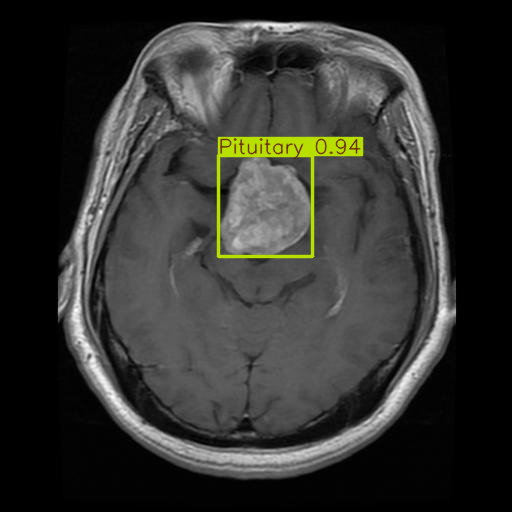

In [ ]:
for r in res_img:
    img_with_boxes = r.plot()
    display(Image.fromarray(img_with_boxes))

In [ ]:
!zip -r runs.zip /kaggle/working/runs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
